In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
np.seterr(divide = 'ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
data = pd.read_csv('cleaned_googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [3]:
data = data.drop_duplicates()
data.App.is_unique

False

In [4]:
dups = data[data.App.duplicated(keep=False)]
dups.sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,10000000,Free,0.0,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,10000000,Free,0.0,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0.0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,textPlus: Free Text & Calls,SOCIAL,4.1,382120,28M,10000000,Free,0.0,Everyone,Social,2018-07-26,7.3.1,4.1 and up
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,10000000,Free,0.0,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,10000000,Free,0.0,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,10000000,Free,0.0,Everyone,Weather,2018-08-06,Varies with device,Varies with device


In [5]:
drop_me = data[data.App.duplicated(keep='last')]
data = data.drop(drop_me.index)
data.App.is_unique

True

In [6]:
soc = data[data.Category == 'SOCIAL']
soc.Category.unique()

array(['SOCIAL'], dtype=object)

In [7]:
soc.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2551,Social network all in one 2018,SOCIAL,4.3,1403,3.7M,100000,Free,0.0,Everyone,Social,2018-01-30,1.0,4.0 and up
2553,TextNow - free text + calls,SOCIAL,4.4,441189,Varies with device,10000000,Free,0.0,Everyone,Social,2018-08-03,Varies with device,Varies with device
2555,The Messenger App,SOCIAL,4.4,4919,2.8M,1000000,Free,0.0,Everyone,Social,2018-08-03,0.1.1,4.1 and up
2556,Messenger Pro,SOCIAL,4.4,13762,3.9M,1000000,Free,0.0,Everyone,Social,2018-05-09,1.0.2,4.1 and up
2557,"Free Messages, Video, Chat,Text for Messenger ...",SOCIAL,4.3,6086,3.1M,1000000,Free,0.0,Teen,Social,2018-06-14,1.0.9,4.3 and up


In [8]:
len(soc)

239

In [9]:
soc = soc.drop(['Category','Rating','Reviews','Size','Type','Price','Genres','Last Updated','Current Ver','Android Ver'], axis=1)
soc.head()

,App,Installs,Content Rating
2551,Social network all in one 2018,100000,Everyone
2553,TextNow - free text + calls,10000000,Everyone
2555,The Messenger App,1000000,Everyone
2556,Messenger Pro,1000000,Everyone
2557,"Free Messages, Video, Chat,Text for Messenger ...",1000000,Teen


In [10]:
soc['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+'], dtype=object)

In [15]:
#frequency chart

content_unique = soc['Content Rating'].unique()

temp_dict = {}
for i in range(len(content_unique)):
    temp_row = {content_unique[i]:[len(soc[soc['Content Rating'] == content_unique[i]])]}
    temp_dict.update(temp_row)

df = pd.DataFrame(temp_dict)  
df = df.melt()
df.columns = ['Content Rating', 'Frequency']
df = df.sort_values(by='Content Rating', ascending=True)
df = df.reset_index(drop=True)

#df.to_csv('content_freq.csv', sep=',', index=False)

df

,Content Rating,Frequency
0,Everyone,87
1,Everyone 10+,2
2,Mature 17+,45
3,Teen,105


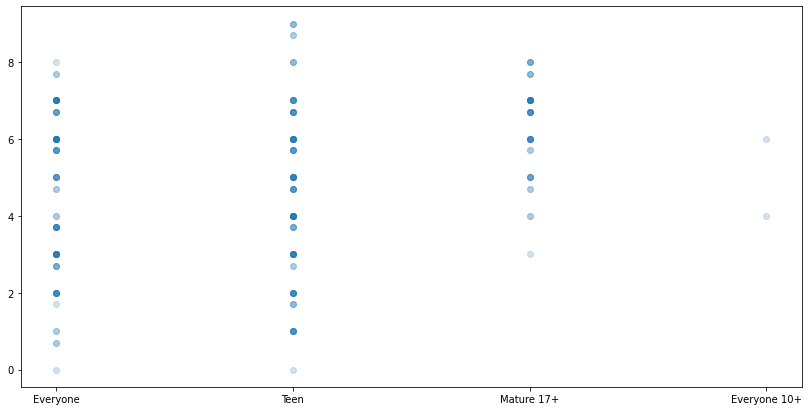

In [18]:
plt.figure(figsize=(14,7))
plt.scatter(soc['Content Rating'], np.log10(soc.Installs), alpha=.2)

In [20]:
#i have a feeling this might be no relationship, but... let's see
#need to encode categories

soc = soc.reset_index(drop=True)
soc.head()

,App,Installs,Content Rating
0,Social network all in one 2018,100000,Everyone
1,TextNow - free text + calls,10000000,Everyone
2,The Messenger App,1000000,Everyone
3,Messenger Pro,1000000,Everyone
4,"Free Messages, Video, Chat,Text for Messenger ...",1000000,Teen


In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

soc['Content Rating enc'] = le.fit_transform(soc['Content Rating'])
ohe_df = pd.DataFrame(ohe.fit_transform(soc[['Content Rating enc']]).toarray())
soc = soc.join(ohe_df)
soc.head()

,App,Installs,Content Rating,Content Rating enc,0,1,2,3
0,Social network all in one 2018,100000,Everyone,0,1.0,0.0,0.0,0.0
1,TextNow - free text + calls,10000000,Everyone,0,1.0,0.0,0.0,0.0
2,The Messenger App,1000000,Everyone,0,1.0,0.0,0.0,0.0
3,Messenger Pro,1000000,Everyone,0,1.0,0.0,0.0,0.0
4,"Free Messages, Video, Chat,Text for Messenger ...",1000000,Teen,3,0.0,0.0,0.0,1.0


In [22]:
soc.rename(columns={0:'Everyone'}, inplace=True)
soc.rename(columns={1:'Everyone 10+'}, inplace=True)
soc.rename(columns={2:'Mature 17+'}, inplace=True)
soc.rename(columns={3:'Teen'}, inplace=True)
soc.head()

,App,Installs,Content Rating,Content Rating enc,Everyone,Everyone 10+,Mature 17+,Teen
0,Social network all in one 2018,100000,Everyone,0,1.0,0.0,0.0,0.0
1,TextNow - free text + calls,10000000,Everyone,0,1.0,0.0,0.0,0.0
2,The Messenger App,1000000,Everyone,0,1.0,0.0,0.0,0.0
3,Messenger Pro,1000000,Everyone,0,1.0,0.0,0.0,0.0
4,"Free Messages, Video, Chat,Text for Messenger ...",1000000,Teen,3,0.0,0.0,0.0,1.0


In [23]:
#double checking columns were renamed correctly
soc[soc['Content Rating'] == 'Everyone 10+']

,App,Installs,Content Rating,Content Rating enc,Everyone,Everyone 10+,Mature 17+,Teen
17,MobilePatrol Public Safety App,1000000,Everyone 10+,1,0.0,1.0,0.0,0.0
150,Cyprus Police,10000,Everyone 10+,1,0.0,1.0,0.0,0.0


In [25]:
soc[soc['Content Rating'] == 'Mature 17+'].head()

,App,Installs,Content Rating,Content Rating enc,Everyone,Everyone 10+,Mature 17+,Teen
6,Jodel - The Hyperlocal App,1000000,Mature 17+,2,0.0,0.0,1.0,0.0
13,SPARK - Live random video chat & meet new people,5000000,Mature 17+,2,0.0,0.0,1.0,0.0
16,Meet – Talk to Strangers Using Random Video Chat,5000000,Mature 17+,2,0.0,0.0,1.0,0.0
19,HTC Social Plugin - Facebook,10000000,Mature 17+,2,0.0,0.0,1.0,0.0
24,Tango - Live Video Broadcast,100000000,Mature 17+,2,0.0,0.0,1.0,0.0


In [26]:
soc = soc.drop(['Content Rating','Content Rating enc'], axis=1)
soc.head()

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen
0,Social network all in one 2018,100000,1.0,0.0,0.0,0.0
1,TextNow - free text + calls,10000000,1.0,0.0,0.0,0.0
2,The Messenger App,1000000,1.0,0.0,0.0,0.0
3,Messenger Pro,1000000,1.0,0.0,0.0,0.0
4,"Free Messages, Video, Chat,Text for Messenger ...",1000000,0.0,0.0,0.0,1.0


<AxesSubplot:>

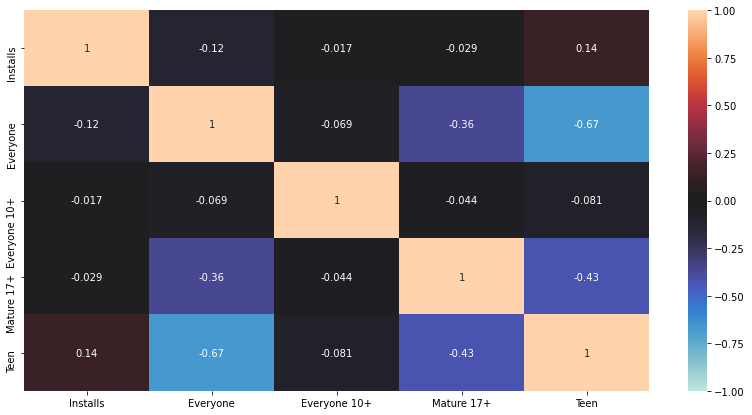

In [28]:
f, ax = plt.subplots(figsize=(14,7))
sns.heatmap(soc.corr(), ax=ax, vmin=-1, annot=True, cmap='icefire')

In [29]:
#yup, no correlation
#teen and everyone stickout, but its still an obviously weak relationship

#anova
from scipy import stats

stats.f_oneway(
    soc.Installs[soc['Everyone'] == 1],
    soc.Installs[soc['Everyone 10+'] == 1],
    soc.Installs[soc['Mature 17+'] == 1],
    soc.Installs[soc['Teen'] == 1]
)

F_onewayResult(statistic=1.6745532610041383, pvalue=0.17317486330663856)

In [30]:
#k pvalue is low, but not below .05
#... the f is greater than 1, but not significantly? so content ratings have slightly noticeable different mean values
#... i think

#checking levene
e = soc.Installs[soc['Everyone'] == 1]
e10 = soc.Installs[soc['Everyone 10+'] == 1]
m = soc.Installs[soc['Mature 17+'] == 1]
t = soc.Installs[soc['Teen'] == 1]

stats.levene(e, e10, m, t)

LeveneResult(statistic=1.6928457581736553, pvalue=0.16924549656262988)

In [31]:
stats.levene(e, e10, m, t, center='mean')

LeveneResult(statistic=7.171553512657943, pvalue=0.00012567526067061352)

In [33]:
#ooohhhhhhhhh........... hm, k
#so our data doesn't meet the assumption to perform the anova since variances are too different

#I wonder if everyone 10+ is the direct cause
check = soc
check.head()

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen
0,Social network all in one 2018,100000,1.0,0.0,0.0,0.0
1,TextNow - free text + calls,10000000,1.0,0.0,0.0,0.0
2,The Messenger App,1000000,1.0,0.0,0.0,0.0
3,Messenger Pro,1000000,1.0,0.0,0.0,0.0
4,"Free Messages, Video, Chat,Text for Messenger ...",1000000,0.0,0.0,0.0,1.0


In [34]:
switch = check[check['Everyone 10+'] == 1]
switch.head()

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen
17,MobilePatrol Public Safety App,1000000,0.0,1.0,0.0,0.0
150,Cyprus Police,10000,0.0,1.0,0.0,0.0


In [53]:
app17 = check.iloc[17]
app150 = check.iloc[150]
app17['Everyone'] = 1.0
app150['Everyone'] = 1.0
app17['Everyone 10+'] = 0.0
app150['Everyone 10+'] = 0.0

check.iloc[17] = app17
check.iloc[150] = app150

check.iloc[17]

App             MobilePatrol Public Safety App
Installs                               1000000
Everyone                                     1
Everyone 10+                                 0
Mature 17+                                   0
Teen                                         0
Name: 17, dtype: object

In [55]:
check.iloc[150]

App             Cyprus Police
Installs                10000
Everyone                    1
Everyone 10+                0
Mature 17+                  0
Teen                        0
Name: 150, dtype: object

In [56]:
check[check['Everyone 10+'] == 1]

,App,Installs,Everyone,Everyone 10+,Mature 17+,Teen


In [57]:
check = check.drop(['Everyone 10+'], axis=1)
check.head()

,App,Installs,Everyone,Mature 17+,Teen
0,Social network all in one 2018,100000,1.0,0.0,0.0
1,TextNow - free text + calls,10000000,1.0,0.0,0.0
2,The Messenger App,1000000,1.0,0.0,0.0
3,Messenger Pro,1000000,1.0,0.0,0.0
4,"Free Messages, Video, Chat,Text for Messenger ...",1000000,0.0,0.0,1.0


In [58]:
e_2 = check.Installs[check['Everyone'] == 1]
m_2 = check.Installs[check['Mature 17+'] == 1]
t_2 = check.Installs[check['Teen'] == 1]

stats.levene(e_2, m_2, t_2, center='mean')

LeveneResult(statistic=10.793887557921906, pvalue=3.269166893519241e-05)

In [ ]:
#OH NO ITS WORSE AHHAHAHAAHHA
#ok well